In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn import metrics
nltk.download('stopwords')
nltk.download('punkt')
from google.colab import drive
drive.mount('/content/drive')

# messages = pd.read_csv("/content/drive/My Drive/Colab Datasets/super_drift_fast.csv", encoding='latin-1')

messages = pd.read_csv('/content/drive/My Drive/Colab Datasets/spam_overall.csv',encoding = 'latin-1')
# messages = pd.read_excel('punny1.xlsx')
messages['length'] = messages['SMS'].apply(len)
messages.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mounted at /content/drive


,SMS,length
0,YOU HAVE WON! As a valued Vodafone customer ou...,134
1,Guinness Record! World?s most pierced women! C...,163
2,U have a secret admirer. REVEAL who thinks U R...,147
3,U have a secret admirer who is looking 2 make ...,132
4,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,158


In [ ]:
# messages = pd.read_excel('punny1.xlsx')
# messages['length'] = messages['Text'].apply(len)
# messages.head()

In [ ]:
messages['Tokens'] = messages['SMS'].apply(nltk.word_tokenize)
messages['Tokens'] = messages['Tokens'].apply(len)
messages.head()

,SMS,length,mistake_count,Tokens
0,YOU HAVE WON! As a valued Vodafone customer ou...,134,1,29
1,Guinness Record! World?s most pierced women! C...,163,1,39
2,U have a secret admirer. REVEAL who thinks U R...,147,4,32
3,U have a secret admirer who is looking 2 make ...,132,1,26
4,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,158,10,30


In [ ]:
#Count emoticons
import re
def regfinder(str1):
  return len(re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', str1))
# regfinder("Yes you beat it :) :)")
messages['emoticons'] = messages['SMS'].apply(regfinder)
# # print(len(re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)',messages["message"][209])))
messages.head()

,Year,Source,SMS,Label,length,Tokens,emoticons
0,2012,UCI,YOU HAVE WON! As a valued Vodafone customer ou...,1,134,29,0
1,2012,UCI,Guinness Record! World?s most pierced women! C...,1,163,39,0
2,2012,UCI,U have a secret admirer. REVEAL who thinks U R...,1,147,32,0
3,2012,UCI,U have a secret admirer who is looking 2 make ...,1,132,26,0
4,2012,UCI,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,1,158,30,0


In [ ]:
# Special_chars count
import string
import collections as ct
def counter(sms):
  special_chars = '[@_!#$%^&*()<>?/\|}{~:]'
  return sum(v for k, v in ct.Counter(sms).items() if k in special_chars)
messages['Special_chars'] = messages['SMS'].apply(counter)
messages.head()

,Year,Source,SMS,Label,length,Tokens,emoticons,Special_chars
0,2012,UCI,YOU HAVE WON! As a valued Vodafone customer ou...,1,134,29,0,2
1,2012,UCI,Guinness Record! World?s most pierced women! C...,1,163,39,0,10
2,2012,UCI,U have a secret admirer. REVEAL who thinks U R...,1,147,32,0,0
3,2012,UCI,U have a secret admirer who is looking 2 make ...,1,132,26,0,1
4,2012,UCI,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,1,158,30,0,2


In [ ]:
import re

def FindUrls(string):
    # Separate regex patterns for keywords
    http_regex = r"http"
    www_regex = r"www"
    goog_regex = r"goog"
    bit_regex = r"bit[.]?"
    bitly_regex = r"bitly[.]?"

    # Check if any of the keywords exist in the string
    if re.search(http_regex, string, re.I):
        return 1

    if re.search(www_regex, string, re.I):
        return 1

    if re.search(goog_regex, string, re.I):
        return 1

    if re.search(bit_regex, string, re.I):
        return 1

    if re.search(bitly_regex, string, re.I):
        return 1

    # If none of the keywords are found, use the original regex for URLs
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url_matches = re.findall(regex, string)
    return len([x[0] for x in url_matches])

# Example usage:
messages['Links'] = messages['SMS'].apply(FindUrls)
messages.head()

In [ ]:
# Count cell nos
import re
def cellno(sms):
  # paragraph='Currently, College of Engineering, Motihari. My contact number is +919852458339.  another is 0314 9719673 I love to spend my time to learn the Python program.'
  return len(re.findall("\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}", sms))
messages['Cell_no'] = messages['SMS'].apply(cellno)
messages.head()

,Year,Source,SMS,Label,length,Tokens,emoticons,Special_chars,Links,Cell_no
0,2012,UCI,YOU HAVE WON! As a valued Vodafone customer ou...,1,134,29,0,2,0,1
1,2012,UCI,Guinness Record! World?s most pierced women! C...,1,163,39,0,10,0,0
2,2012,UCI,U have a secret admirer. REVEAL who thinks U R...,1,147,32,0,0,0,2
3,2012,UCI,U have a secret admirer who is looking 2 make ...,1,132,26,0,1,0,1
4,2012,UCI,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,1,158,30,0,2,1,0


In [ ]:
# Count email ids, Need improvement...
import re
def emailid(sms):
  # line = "should we use regex more often? let me know at  jdsk@bob.com.lol or popop@coco.com"
  match = re.findall(r'[\w.+-]+@[\w-]+\.[\w.-]+', sms)
  return len(match)
messages['Email_id'] = messages['SMS'].apply(emailid)
messages.head()

,Year,Source,SMS,Label,length,Tokens,emoticons,Special_chars,Links,Cell_no,Email_id
0,2012,UCI,YOU HAVE WON! As a valued Vodafone customer ou...,1,134,29,0,2,0,1,0
1,2012,UCI,Guinness Record! World?s most pierced women! C...,1,163,39,0,10,0,0,0
2,2012,UCI,U have a secret admirer. REVEAL who thinks U R...,1,147,32,0,0,0,2,0
3,2012,UCI,U have a secret admirer who is looking 2 make ...,1,132,26,0,1,0,1,0
4,2012,UCI,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,1,158,30,0,2,1,0,0


In [ ]:
import itertools
def capWords(sms):
  # s = "This is NEW but Can be used to WIN again so Lets DO IT!"
  new_s = [' '.join(b) for a, b in itertools.groupby(sms.split(), key=str.isupper) if a]
  return len(new_s)
messages['Cap_words'] = messages['SMS'].apply(capWords)
messages.head()

,Year,Source,SMS,Label,length,Tokens,emoticons,Special_chars,Links,Cell_no,Email_id,Cap_words
0,2012,UCI,YOU HAVE WON! As a valued Vodafone customer ou...,1,134,29,0,2,0,1,0,2
1,2012,UCI,Guinness Record! World?s most pierced women! C...,1,163,39,0,10,0,0,0,0
2,2012,UCI,U have a secret admirer. REVEAL who thinks U R...,1,147,32,0,0,0,2,0,4
3,2012,UCI,U have a secret admirer who is looking 2 make ...,1,132,26,0,1,0,1,0,2
4,2012,UCI,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,1,158,30,0,2,1,0,0,3


In [ ]:
messages.to_csv('features1.csv', index=False)

In [ ]:
def text_preprocess(mess):

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()

    # Now just remove any stopwords and non alphabets
    nostop = [word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]
    return nostop
messages["Text"] = messages["SMS"].apply(text_preprocess)
messages["Text"] = messages["SMS"].agg(lambda x: ' '.join(map(str, x)))

In [ ]:
# https://www.datacamp.com/community/tutorials/wordcloud-python
import matplotlib
import pylab as plt

from wordcloud import WordCloud

spam_words = ' '.join(list(messages[messages['Label'] == 1]['SMS']))
spam_wc = WordCloud(width = 512,height = 512, max_words=500, background_color ='black').generate(spam_words)
# plt.figure(figsize = (10, 8), facecolor = None)
# plt.imshow(spam_wc)
# plt.axis('off')
# plt.tight_layout(pad = 0)
# plt.show()
ds = spam_wc.words_
print(ds)
for key, value in ds.items() :
    print (key)

In [ ]:
messages_key = pd.read_csv("spam_words.csv", encoding='latin-1')
messages_key.columns = ["keywords"]
# print(messages_key.tail(3))
def word_count(str):
	    counts = 0
	    sms = str.split()

	    for word in sms:
	        if word in messages_key["keywords"].tolist():
	            counts = counts + 1
	    return counts
# print(messages["message"][16])
# print(word_count(messages["message"][16]))

messages['Spam_words'] = messages['Text'].apply(word_count)
messages.head()

,Year,Source,SMS,Label,length,Tokens,emoticons,Special_chars,Links,Cell_no,Email_id,Cap_words,Text,Spam_words
0,2012,UCI,YOU HAVE WON! As a valued Vodafone customer ou...,1,134,29,0,2,0,1,0,2,Y O U H A V E W O N ! A s a v a l u ...,0
1,2012,UCI,Guinness Record! World?s most pierced women! C...,1,163,39,0,10,0,0,0,0,G u i n n e s s R e c o r d ! W o r l d ? ...,0
2,2012,UCI,U have a secret admirer. REVEAL who thinks U R...,1,147,32,0,0,0,2,0,4,U h a v e a s e c r e t a d m i r e r ...,0
3,2012,UCI,U have a secret admirer who is looking 2 make ...,1,132,26,0,1,0,1,0,2,U h a v e a s e c r e t a d m i r e r ...,0
4,2012,UCI,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,1,158,30,0,2,1,0,0,3,F R E E f o r 1 s t w e e k ! N o 1 ...,0


In [ ]:
messages.to_csv('features.csv', index=False)

In [ ]:
##### Text Tokenization and Normalization

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(sms):
    sms = re.sub(r'\W', ' ', sms)  # Remove all the special characters
    sms = sms.lower()  # Convert to lowercase
    tokens = word_tokenize(sms)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
    return tokens

In [ ]:
##### Keyword Analysis

import nltk
from nltk.probability import FreqDist
nltk.download('wordnet')

# Concatenate all the spam messages
# spam_messages = ' '.join(messages[messages['Label'] == 'spam']['SMS'])
spam_messages = ' '.join(list(messages['SMS'][812:26500]))

# Preprocess the text and get the tokens
spam_tokens = preprocess_text(spam_messages)
# print(len(list(messages['SMS'][812:26055])))

# Get frequency distribution
fdist = FreqDist(spam_tokens)
print(fdist.most_common(100)) # prints the 50 most common words in spam messages

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[('r', 8246), ('get', 7982), ('http', 5646), ('offer', 5462), ('call', 4909), ('free', 4466), ('dear', 3761), ('please', 3403), ('click', 3321), ('app', 2976), ('day', 2973), ('customer', 2894), ('account', 2694), ('com', 2638), ('valid', 2462), ('today', 2356), ('xx', 2341), ('download', 2241), ('card', 2134), ('apply', 2073), ('visit', 2008), ('till', 1997), ('link', 1991), ('flat', 1904), ('sm', 1889), ('tc', 1870), ('use', 1860), ('code', 1742), ('update', 1724), ('x', 1619), ('order', 1618), ('new', 1564), ('bank', 1535), ('xxxx', 1533), ('shop', 1490), ('buy', 1455), ('u', 1454), ('dial', 1388), ('cashback', 1370), ('ly', 1369), ('c', 1366), ('detail', 1347), ('service', 1341), ('xxxxxxxxxx', 1340), ('recharge', 1339), ('special', 1291), ('bit', 1275), ('pay', 1250), ('mobile', 1244), ('sbi', 1238), ('data', 1229), ('point', 1186), ('hi', 1176), ('number', 1165), ('sale', 1164), ('upto', 1157), ('xxx', 1108), ('g', 1102), ('win', 1088), ('online', 1082), ('contact', 1071), ('extr

In [ ]:
# !pip install spellchecker
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.7 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('wordnet')
##### Spelling Mistakes

from spellchecker import SpellChecker

spell = SpellChecker()

def count_mistakes(tokens):
    misspelled = spell.unknown(tokens)
    return len(misspelled)

messages['mistake_count'] = messages['SMS'].apply(lambda x: count_mistakes(preprocess_text(x)))
messages.head()

In [ ]:
# Calculate the ratio mistake_count/spam_tokens
messages['mistake_to_tokens_ratio'] = messages['mistake_count'] / messages['Tokens'] * 100
messages.head()

In [ ]:
!pip install wordcloud

In [ ]:
import textstat
# Step 2: Calculate Readability Scores
def calculate_readability(text):
    # return textstat.flesch_reading_ease(text)  # You can use other readability metrics as well
    return textstat.flesch_kincaid_grade(text)

# Calculate readability scores for each SMS
messages['readability_score'] = messages['SMS'].apply(calculate_readability)
messages.head()

,SMS,length,mistake_count,Tokens,mistake_to_tokens_ratio,readability_score
0,YOU HAVE WON! As a valued Vodafone customer ou...,134,1,29,3.448276,1.0
1,Guinness Record! World?s most pierced women! C...,163,1,39,2.564103,2.5
2,U have a secret admirer. REVEAL who thinks U R...,147,4,32,12.500000,1.9
3,U have a secret admirer who is looking 2 make ...,132,1,26,3.846154,9.1
4,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,158,10,30,33.333333,2.4


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
from wordcloud import WordCloud

plt.figure(figsize=(12, 8))

messages17['mistake_to_tokens_ratio'].plot(range = (0, 250), bins=50, kind='hist', color='blue', label='Ham messages', alpha=0.6)
messages23['mistake_to_tokens_ratio'].plot(range = (0, 250), bins=50, kind='hist', color='red', label='Spam messages', alpha=0.6)

plt.legend()
plt.xlabel("Length of SMS message", fontsize=12)
plt.ylabel("Frequency of SMS messages", fontsize=12)

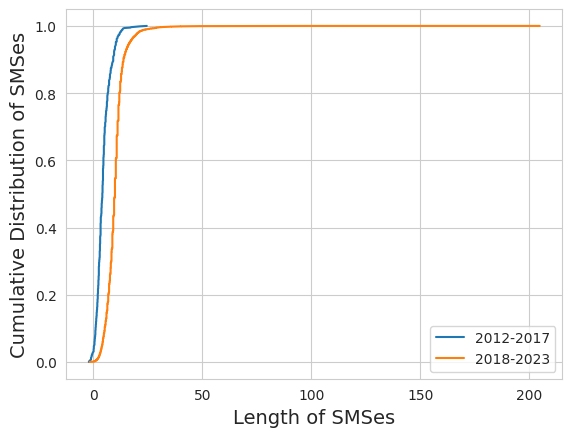

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming you have already loaded your data into messages17 and messages23 dataframes

# Calculate CDF values for 'mistake_to_tokens_ratio' column
cdf_values_17 = np.linspace(0, 1, len(messages17['readability_score']))
cdf_values_23 = np.linspace(0, 1, len(messages23['readability_score']))

# Sort the data for plotting
sorted_values_17 = np.sort(messages17['readability_score'])
sorted_values_23 = np.sort(messages23['readability_score'])

# Plot CDF using Matplotlib
plt.plot(sorted_values_17, cdf_values_17, label='2012-2017')
plt.plot(sorted_values_23, cdf_values_23, label='2018-2023')

plt.xlabel('Length of SMSes', fontsize=14)
plt.ylabel('Cumulative Distribution of SMSes', fontsize=14)
# plt.title('CDF of Mistake to Tokens Ratio')
plt.legend()
plt.grid(True)
plt.savefig("readibility_cdf.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
messages.to_csv('mistake_to_tokens_ratio.csv', index=False)

In [ ]:
import pandas as pd
import re

# Regular expression to extract URLs
url_regex = r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))'

# Function to extract URLs from a text
def extract_urls(text):
    # print (re.findall(url_regex, text))
    return re.findall(url_regex, text)

# Apply the function to each SMS in the dataset
messages['URLs'] = messages['SMS'].apply(extract_urls)
messages['URLs'].to_csv('urls.csv', index=False)

In [ ]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import textstat

# Step 1: Read the SMS data from CSV
input_csv_path = 'super_evolution.csv'
output_csv_path = 'output_readability_scores.csv'

# Read the CSV file into a DataFrame
sms_data = pd.read_csv(input_csv_path, encoding = "latin1")

# Step 2: Calculate Readability Scores
def calculate_readability(text):
    # return textstat.flesch_reading_ease(text)  # You can use other readability metrics as well
    return textstat.flesch_kincaid_grade(text)

# Calculate readability scores for each SMS
sms_data['readability_score'] = sms_data['SMS'].apply(calculate_readability)

# Step 3: Write Results to CSV
sms_data.to_csv(output_csv_path, index=False)

print("Readability scores calculated and saved to the output CSV.")


Readability scores calculated and saved to the output CSV.


In [ ]:
import csv
import textstat
from google.colab import drive
drive.mount('/content/drive')

def calculate_metrics(text):
    num_characters = len(text)
    num_words = len(text.split())
    num_sentences = text.count('.') + text.count('!') + text.count('?')
    avg_sentence_length = num_characters / num_sentences if num_sentences > 0 else 0
    avg_word_length = sum(len(word) for word in text.split()) / num_words if num_words > 0 else 0
    richness = len(set(text.split())) / num_words if num_words > 0 else 0
    ari = textstat.automated_readability_index(text)
    flesch_score = textstat.flesch_reading_ease(text)

    return num_characters, num_words, num_sentences, avg_sentence_length, avg_word_length, richness, ari, flesch_score

input_file = '/content/drive/My Drive/Colab Datasets/super_test_spam.csv'
# input_file = 'super_train.csv'
output_file = 'output_super_test_spam.csv'

all_metrics = []  # Store metrics for each SMS to calculate averages later

with open(input_file, 'r', encoding='latin1') as infile, open(output_file, 'w', encoding='utf-8', newline='') as outfile:
# with open(input_file, 'r', encoding='latin1') as infile, open(output_file, 'w', encoding='utf-8', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    # Write header row to the output CSV file
    header = ['no of characters', 'no of words', 'no of sentences', 'average sentence length', 'average word length', 'richness', 'ARI', 'Flesch Reading Ease']
    writer.writerow(header)

    # Skip the header row in the input CSV
    next(reader)

    for row in reader:
        sms_text = row[0]  # Assuming the SMS text is in the first column of the CSV
        metrics = calculate_metrics(sms_text)
        all_metrics.append(metrics)
        writer.writerow(metrics)

# Calculate averages
num_sms = len(all_metrics)
avg_metrics = [sum(metric[i] for metric in all_metrics) / num_sms for i in range(len(all_metrics[0]))]

# Append averages to the output CSV
with open(output_file, 'a', encoding='utf-8', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['Average'] + avg_metrics)

print("Metrics calculated and written to", output_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Metrics calculated and written to output_super_test_spam.csv


In [ ]:
import pandas as pd
import textstat

def calculate_metrics(text):
    num_characters = len(text)
    num_words = len(text.split())
    num_sentences = text.count('.') + text.count('!') + text.count('?')
    avg_sentence_length = num_characters / num_sentences if num_sentences > 0 else 0
    avg_word_length = sum(len(word) for word in text.split()) / num_words if num_words > 0 else 0
    richness = len(set(text.split())) / num_words if num_words > 0 else 0
    ari = textstat.automated_readability_index(text)
    flesch_score = textstat.flesch_reading_ease(text)

    return num_characters, num_words, num_sentences, avg_sentence_length, avg_word_length, richness, ari, flesch_score

input_file = 'punny1.xlsx'  # Update with your Excel file path
output_file = 'output_punny.xlsx'  # Update with your output Excel file path

# Read the input Excel file
df = pd.read_excel(input_file)

# Calculate metrics for each row
df['Metrics'] = df['SMS'].apply(calculate_metrics)

# Expand the Metrics column into separate columns
df[['no of characters', 'no of words', 'no of sentences', 'average sentence length', 'average word length', 'richness', 'ARI', 'Flesch Reading Ease']] = pd.DataFrame(df['Metrics'].tolist(), index=df.index)

# Drop the Metrics column
df = df.drop(columns=['Metrics'])

# Calculate averages
avg_metrics = df.drop(columns=['SMS']).mean()

# Append averages as a new row
avg_row = pd.DataFrame({'SMS': 'Average', **avg_metrics.to_dict()}, index=[0])
df = df.append(avg_row, ignore_index=True)

# Write the DataFrame to the output Excel file
df.to_excel(output_file, index=False)

print("Metrics calculated and written to", output_file)
